Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 96)     │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 96)     │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6144)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,573,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,822,228 (14.58 MB)

 Trainable params: 1,911,113 (7.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,911,115 (7.29 MB)

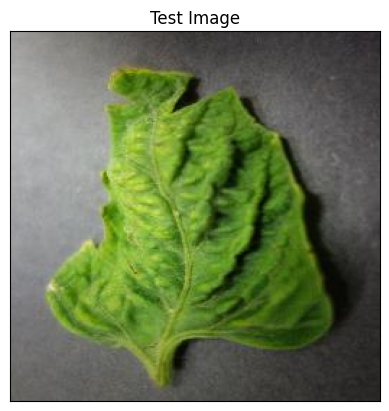

(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


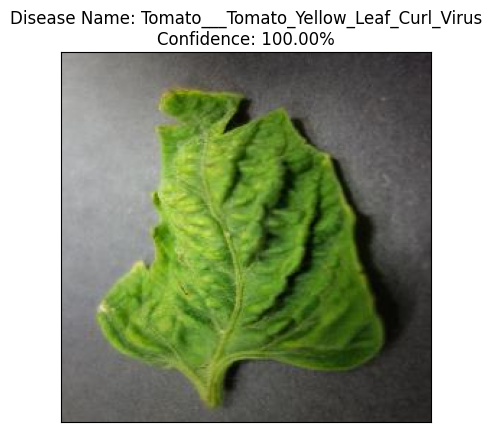

Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Confidence Score: 100.00%


In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')
model.summary()

# Load and preprocess the image
image_path = "test/TomatoYellowCurlVirus4.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the test image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Resize the image and convert it to an array
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch
print(input_arr.shape)

# Make the prediction
prediction = model.predict(input_arr)

# Get the index of the predicted class and the corresponding confidence score
result_index = np.argmax(prediction)
confidence_score = np.max(prediction) * 100  # Multiply by 100 to get the percentage

# Define the class names
class_name = ['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy']

# Get the predicted class name
model_prediction = class_name[result_index]

# Display the result with the confidence score
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}\nConfidence: {confidence_score:.2f}%")
plt.xticks([])
plt.yticks([])
plt.show()

# Print the result
print(f"Predicted Class: {model_prediction}")
print(f"Confidence Score: {confidence_score:.2f}%")
